## Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Directory, Image-Name & Image-Size Definitions

In [2]:
model_dir = '/home/drevital/obstacle_detection/results/obs_det_3_results/obs_det_3'
source_no_obs_dir = '/home/drevital/obstacle_detection_dataset/not_obstacle'
source_obs_dir = '/home/drevital/obstacle_detection_dataset/obstacle'
source_no_obs_imname = 'datalight_test_japan_mor1mp4_f616_o9.png'
source_obs_imname = 'datasdv1mp4_f397_o59_1972.png'
img_height = 200
img_width = 200

## Read Source Images

In [3]:
source_no_obs_imrgb = cv2.imread(os.path.join(source_no_obs_dir, source_no_obs_imname))
source_no_obs_image = cv2.cvtColor(source_no_obs_imrgb, cv2.COLOR_BGR2GRAY)  
source_obs_imrgb = cv2.imread(os.path.join(source_obs_dir, source_obs_imname))
source_obs_image = cv2.cvtColor(source_obs_imrgb, cv2.COLOR_BGR2GRAY)        

## Display Source Images

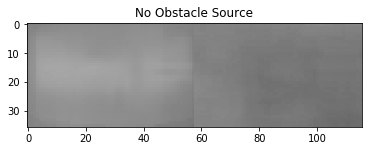

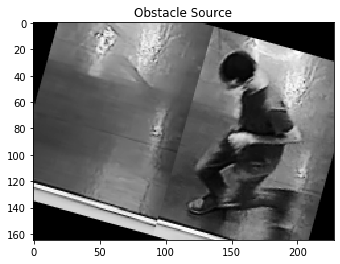

In [4]:
plt.imshow(source_no_obs_image, cmap='gray', vmin=0, vmax=255)
plt.title('No Obstacle Source')
plt.show() 

plt.imshow(source_obs_image, cmap='gray', vmin=0, vmax=255)
plt.title('Obstacle Source')
plt.show() 

## Separate Source Images

In [5]:
source_no_obs_width = source_no_obs_image.shape[1]
source_no_obs_im1 = source_no_obs_image[:,:source_no_obs_width//2]
source_no_obs_im2 = source_no_obs_image[:,source_no_obs_width//2:]

source_obs_width = source_obs_image.shape[1]
source_obs_im1 = source_obs_image[:,:source_obs_width//2]
source_obs_im2 = source_obs_image[:,source_obs_width//2:]

## Display Separated Source Images

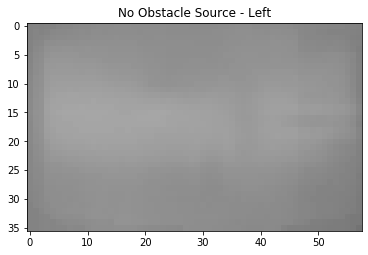

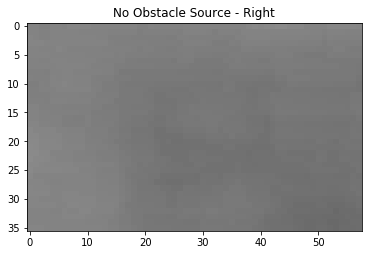

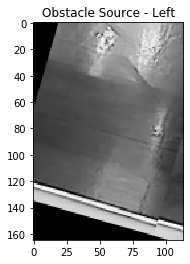

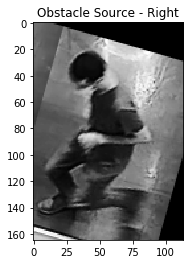

In [6]:
plt.imshow(source_no_obs_im1, cmap='gray', vmin=0, vmax=255)
plt.title('No Obstacle Source - Left')
plt.show() 

plt.imshow(source_no_obs_im2, cmap='gray', vmin=0, vmax=255)
plt.title('No Obstacle Source - Right')
plt.show() 

plt.imshow(source_obs_im1, cmap='gray', vmin=0, vmax=255)
plt.title('Obstacle Source - Left')
plt.show() 

plt.imshow(source_obs_im2, cmap='gray', vmin=0, vmax=255)
plt.title('Obstacle Source - Right')
plt.show() 

## Generate Diff Images

In [7]:
no_obs_diff = cv2.subtract(source_no_obs_im2, source_no_obs_im1)
obs_diff = cv2.subtract(source_obs_im2, source_obs_im1)

In [8]:
type(obs_diff)

numpy.ndarray

In [9]:
obs_diff.shape

(165, 114)

## Display Diff Images

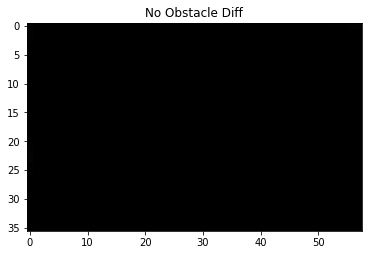

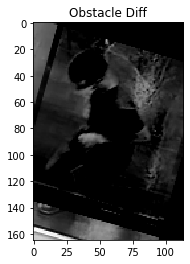

In [10]:
plt.imshow(no_obs_diff, cmap='gray', vmin=0, vmax=255)
plt.title('No Obstacle Diff')
plt.show()

plt.imshow(obs_diff, cmap='gray', vmin=0, vmax=255)
plt.title('Obstacle Diff')
plt.show()

## Save Diff Images

In [11]:
no_obs_diff = no_obs_diff.reshape(no_obs_diff.shape[0], no_obs_diff.shape[1], 1)
tf.keras.preprocessing.image.save_img('no_obs_diff.png', no_obs_diff)
obs_diff = obs_diff.reshape(obs_diff.shape[0], obs_diff.shape[1], 1)
tf.keras.preprocessing.image.save_img('obs_diff.png', obs_diff)

## Load Trained Model

In [12]:
model = tf.keras.models.load_model(model_dir)

## Load Diff Images for Prediction

In [13]:
obs_image = tf.keras.preprocessing.image.load_img('obs_diff.png',
                                              color_mode='grayscale',
                                              target_size=(img_height, img_width))
obs_input_arr = keras.preprocessing.image.img_to_array(obs_image)
obs_input_arr = np.array([obs_input_arr])  # Convert single image to a batch.
obs_input_arr /= 255.0

no_obs_image = tf.keras.preprocessing.image.load_img('no_obs_diff.png',
                                              color_mode='grayscale',
                                              target_size=(img_height, img_width))
no_obs_input_arr = keras.preprocessing.image.img_to_array(no_obs_image)
no_obs_input_arr = np.array([no_obs_input_arr])  # Convert single image to a batch.
no_obs_input_arr /= 255.0

## Predict 

In [14]:
no_obs_prediction = model.predict(no_obs_input_arr)
obs_prediction = model.predict(obs_input_arr)

## Show No Obstacle Prediction

In [15]:
no_obs_prediction

array([[0.02058363]], dtype=float32)

## Show Obstacle Prediction

In [16]:
obs_prediction

array([[0.99945325]], dtype=float32)